In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)
def test_softmax():
    test_cases = [
        (np.array([[0,0,0]]), "zeros"),
        (np.array([[1,2,3]]), "simple"),
        (np.array([[1000,1000,1000]]), "large"),
        (np.array([[-1000,-1000,-1000]]), "small"),
        (np.array([[1,0,-1]]), "mixed"),
    ]
    for z, name in test_cases:
        s = softmax(z)
        assert np.allclose(np.sum(s,axis=1),1), f"fails: {name}"
        assert np.all(s>=0), f"negative: {name}"
    print("Softmax: All tests passed!")

test_softmax()


Softmax: All tests passed!


In [3]:
def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))
def test_loss_softmax():
    y_true = np.array([0,1,0])
    y_pred = np.array([0.1,0.8,0.1])
    assert np.isclose(loss_softmax(y_true,y_pred), -np.log(0.8))

    y_true = np.array([1,0,0])
    y_pred = np.array([0.3,0.4,0.3])
    assert np.isclose(loss_softmax(y_true,y_pred), -np.log(0.3))

    print("Loss_softmax: All tests passed!")

test_loss_softmax()


Loss_softmax: All tests passed!


In [4]:
def cost_softmax(X, y, W, b):
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n
def test_cost_softmax():
    X = np.array([[1,2],[2,3],[3,4]])
    y = np.array([[1,0],[0,1],[1,0]])
    W = np.array([[1,-1],[-1,1]])
    b = np.array([0,0])

    z = np.dot(X,W) + b
    y_pred = softmax(z)
    expected = -np.sum(y*np.log(y_pred+1e-10))/3

    assert np.isclose(cost_softmax(X,y,W,b),expected)
    print("Cost_softmax: All tests passed!")

test_cost_softmax()


Cost_softmax: All tests passed!


In [5]:
def compute_gradient_softmax(X, y, W, b):
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b
def test_compute_gradient_softmax():
    X = np.array([[1,2],[3,4]])
    y = np.array([[1,0],[0,1]])
    W = np.array([[0.1,0.2],[0.3,0.4]])
    b = np.array([0.01,0.02])

    z = np.dot(X,W)+b
    y_pred = softmax(z)

    grad_W_exp = np.dot(X.T, (y_pred - y))/2
    grad_b_exp = np.sum((y_pred - y),axis=0)/2

    gW, gb = compute_gradient_softmax(X,y,W,b)

    assert np.allclose(gW,grad_W_exp)
    assert np.allclose(gb,grad_b_exp)
    print("Gradient_softmax: All tests passed!")

test_compute_gradient_softmax()


Gradient_softmax: All tests passed!


In [6]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []

    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        W -= alpha * grad_W
        b -= alpha * grad_b

        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        if show_cost and i % 200 == 0:
            print(f"Iter {i} | Cost = {cost}")

    return W, b, cost_history
np.random.seed(0)
X = np.random.rand(100,5)
y_idx = np.random.randint(0,3,100)
y = np.zeros((100,3)); y[np.arange(100), y_idx] = 1

W = np.random.rand(5,3)
b = np.random.rand(3)

W2,b2,ch = gradient_descent_softmax(X,y,W,b,alpha=0.05,n_iter=500)
assert ch[-1] < ch[0]
print("GD softmax test passed!")


GD softmax test passed!


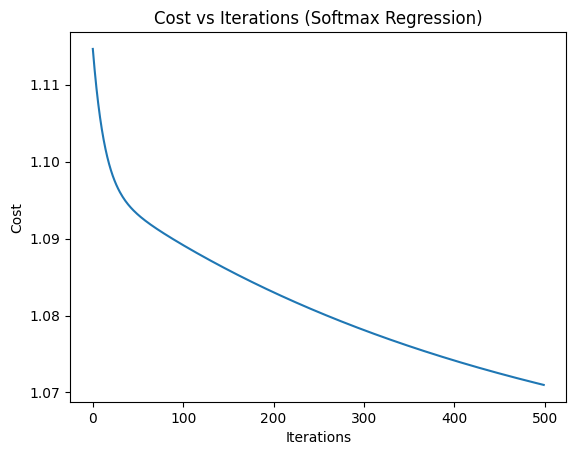

In [7]:
plt.plot(ch)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (Softmax Regression)")
plt.show()


In [8]:
def predict_softmax(X, W, b):
    z = np.dot(X, W) + b
    y_prob = softmax(z)
    return np.argmax(y_prob, axis=1)
def test_predict_softmax():
    np.random.seed(1)
    X = np.random.rand(10,5)
    W = np.random.rand(5,3)
    b = np.random.rand(3)

    pred = predict_softmax(X,W,b)

    assert pred.shape == (10,)
    assert np.all(pred >= 0) and np.all(pred < 3)
    print("Prediction softmax: Test passed!")

test_predict_softmax()


Prediction softmax: Test passed!


In [9]:
def evaluate_multiclass(y_true, y_pred, num_classes):
    confusion = np.zeros((num_classes, num_classes), dtype=int)

    for t,p in zip(y_true, y_pred):
        confusion[t, p] += 1

    precision = []
    recall    = []
    f1        = []

    for c in range(num_classes):
        TP = confusion[c,c]
        FP = confusion[:,c].sum() - TP
        FN = confusion[c,:].sum() - TP

        prec = TP/(TP+FP) if (TP+FP)>0 else 0
        rec  = TP/(TP+FN) if (TP+FN)>0 else 0
        f1_c = 2*prec*rec/(prec+rec) if (prec+rec)>0 else 0

        precision.append(prec)
        recall.append(rec)
        f1.append(f1_c)

    return {
        "confusion_matrix": confusion,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }


In [10]:
# Generate dataset
np.random.seed(42)
n = 300
X = np.random.randn(n,4)
y_raw = np.random.randint(0,3,n)  # 3 classes
num_classes = 3

y = np.zeros((n,num_classes))
y[np.arange(n), y_raw] = 1

# Train-test split
train_size = int(0.8*n)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y_raw[train_size:]

# Initialize parameters
W = np.zeros((4,3))
b = np.zeros(3)

# Train
W,b,cost_h = gradient_descent_softmax(X_train,y_train,W,b,alpha=0.1,n_iter=2000)

# Predict
y_pred = predict_softmax(X_test,W,b)

# Evaluate
metrics = evaluate_multiclass(y_test,y_pred,num_classes)
metrics


{'confusion_matrix': array([[ 9,  8,  1],
        [ 7,  9,  2],
        [11,  7,  6]]),
 'precision': [np.float64(0.3333333333333333),
  np.float64(0.375),
  np.float64(0.6666666666666666)],
 'recall': [np.float64(0.5), np.float64(0.5), np.float64(0.25)],
 'f1_score': [np.float64(0.4),
  np.float64(0.42857142857142855),
  np.float64(0.36363636363636365)]}